In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('customers.csv')
df = df.drop(['Channel','Region'],axis=1)
df.dropna()
df.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [4]:
Data = np.array(df)

In [5]:
sse = []
xk = list(range(2,21))
for i in xk:    
    kmeans = KMeans(n_clusters=i, n_init=100)
    kmeans.fit(Data)
    clusters = kmeans.predict(Data)
    sse.append(kmeans.inertia_)

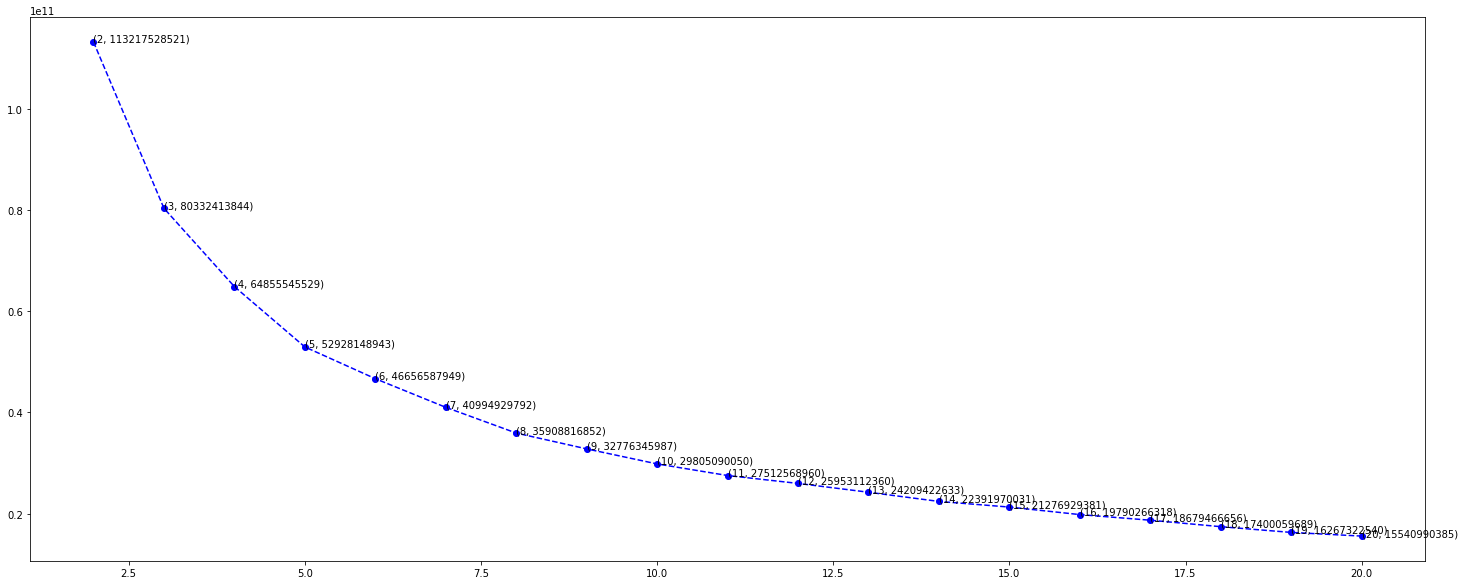

In [6]:
import math
sse = list(map(math.ceil, list(sse)))
fig = plt.figure(figsize=(25,10))
ax = fig.add_subplot(111)
plt.plot(xk,sse, 'bo--')
for xy in zip(xk,sse):
    ax.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')
plt.show()

In [7]:
kmeans = KMeans(n_clusters=5, n_init=100)
kmeans.fit(Data)
clusters = kmeans.predict(Data)

from collections import Counter
clusters_dict = Counter(clusters)
print(kmeans.cluster_centers_)
print(clusters_dict)

[[ 4991.48148148 12140.54320988 18505.50617284  1591.11111111
   8148.24691358  1822.40740741]
 [23710.8490566   3882.05660377  5169.31132075  3772.44339623
   1118.26415094  1693.10377358]
 [20031.28571429 38084.         56126.14285714  2564.57142857
  27644.57142857  2548.14285714]
 [56453.30769231 10026.23076923  8739.         15518.07692308
   1258.23076923  7170.53846154]
 [ 6387.80686695  3255.56223176  4056.56223176  2588.8583691
   1199.3304721    999.16309013]]
Counter({4: 233, 1: 106, 0: 81, 3: 13, 2: 7})
